# Introduction

# Phase 1 : Exploration & Préparation des Données 📊

In [3]:
# Cloner le dépôt GitHub dans l'environnement Colab
!git clone https://github.com/M-Carre/OC.git

Cloning into 'OC'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 3 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), 77.74 KiB | 3.89 MiB/s, done.


On commence par les importations.

In [5]:
# Manipulation de données
import pandas as pd
import numpy as np

# Traitement de texte (sera utilisé plus tard pour le prétraitement)
import nltk
import re # Pour les expressions régulières (utile pour le nettoyage)

# Visualisation (utile pour l'Analyse Exploratoire des Données - EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Utilitaires Scikit-learn (pour la division des données, métriques, etc.)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Configuration pour les visualisations (optionnel mais améliore le rendu)
sns.set_theme(style="whitegrid")

print("Bibliothèques de base importées.")
# Note : MLflow, TensorFlow/Keras, PyTorch, Transformers seront importés/installés plus tard
# Note : NLTK pourrait nécessiter un téléchargement de données (ex: nltk.download('stopwords'))

Bibliothèques de base importées.


## Analyse exploratoire

On charge ensuite les données.

In [4]:
# Accédez au contenu du drive depuis le notebook
from google.colab import drive
drive.mount('/content/drive')

# Définition du chemin d'accès
file_path = '/content/drive/MyDrive/Colab Notebooks/OC/P7/training.1600000.processed.noemoticon.csv'

# Définir les noms de colonnes car le fichier n'a pas d'en-tête
column_names = ['target', 'id', 'date', 'flag', 'user', 'text']

# Charger le dataset
df = pd.read_csv(
    file_path,
    encoding='ISO-8859-1', # ou 'latin1'
    header=None,
    names=column_names
)

# Afficher les 5 premières lignes et la forme du DataFrame pour vérifier
print(f"Dataset chargé. Forme : {df.shape}")
print(display(df.head()))

Mounted at /content/drive
Dataset chargé. Forme : (1600000, 6)


,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


None


Les données ont bien été importées.
On a la target 0 qui correspond à des commentaires négatifs situés dans la colonne text et le 4 qui correspond à des commentaires positifs.

Commençons par quelques vérifications fondamentales :

- Informations Générales et Types de Données

- Valeurs Manquantes

- Distribution de la Cible

Informations Générales sur le DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   id      1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


Nombre de valeurs manquantes par colonne:
target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64


Distribution de la variable 'target':
target
0    800000
4    800000
Name: count, dtype: int64


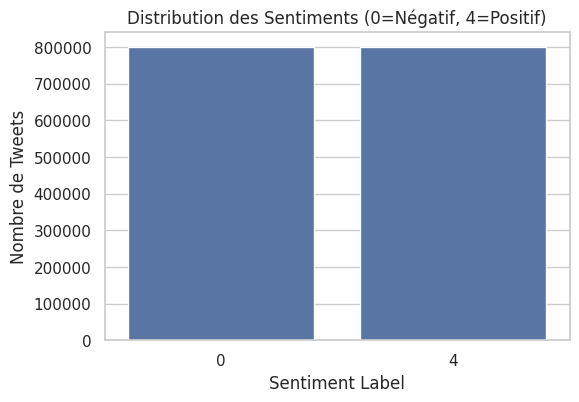

In [4]:
# 1. Informations Générales et Types de Données
print("Informations Générales sur le DataFrame:")
df.info()

print("\n" + "="*50 + "\n") # Séparateur visuel

# 2. Vérification des Valeurs Manquantes
print("Nombre de valeurs manquantes par colonne:")
print(df.isnull().sum())

print("\n" + "="*50 + "\n") # Séparateur visuel

# 3. Distribution de la variable cible 'target'
print("Distribution de la variable 'target':")
print(df['target'].value_counts())

# Visualisation de la distribution de la cible
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Distribution des Sentiments (0=Négatif, 4=Positif)')
plt.xlabel('Sentiment Label')
plt.ylabel('Nombre de Tweets')
plt.show()

**Résultats :**

- **Pas de valeurs manquantes**

- Types de données : Les **colonnes sont correctement lues**, bien que date soit un object (chaîne de caractères). Pour notre objectif d'analyse de sentiment basée sur le text, nous n'aurons probablement pas besoin de la convertir en type date/heure. Les colonnes id, flag et user ne seront probablement pas utiles pour la modélisation initiale basée sur le texte.

- **Cible parfaitement équilibrée** : 800 000 tweets négatifs (0) et 800 000 positifs (4). C'est idéal, car cela signifie que les métriques comme l'accuracy seront fiables et que le modèle n'aura pas de biais naturel vers une classe majoritaire.

**Prochaines étapes :**

- **Simplifier la colonne 'target'**: Convertir les valeurs 4 en 1 pour avoir une cible binaire standard (0: Négatif, 1: Positif).

- **Supprimer les colonnes inutiles**: Éliminer id, date, flag, user.

- **Analyser la longueur des tweets**: Examiner la distribution du nombre de caractères par tweet. Cela peut donner une idée de la taille des séquences que nos modèles (surtout les réseaux de neurones) devront gérer.

- **Afficher quelques exemples de tweets**: Regarder quelques textes bruts pour chaque classe (0 et 1) pour avoir une intuition qualitative.

Distribution de la nouvelle variable 'target' (0=Négatif, 1=Positif):
target
0    800000
1    800000
Name: count, dtype: int64


Colonnes après suppression:
Index(['target', 'text'], dtype='object')
Nouvelle forme du DataFrame: (1600000, 2)


Statistiques descriptives de la longueur des tweets:
count    1.600000e+06
mean     7.409011e+01
std      3.644114e+01
min      6.000000e+00
25%      4.400000e+01
50%      6.900000e+01
75%      1.040000e+02
max      3.740000e+02
Name: text_length, dtype: float64


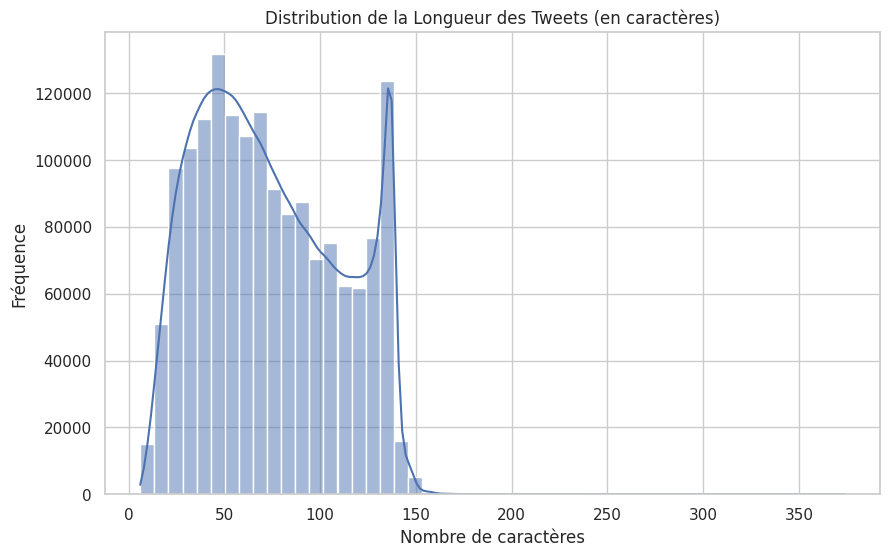



Exemples de Tweets Négatifs (target=0):
["@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D", "is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!", '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds', 'my whole body feels itchy and like its on fire ', "@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. "]

Exemples de Tweets Positifs (target=1):
['I LOVE @Health4UandPets u guys r the best!! ', 'im meeting up with one of my besties tonight! Cant wait!!  - GIRL TALK!!', '@DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart. ', 'Being sick can be really cheap when it hurts too much to eat real food  Plus, your friends make you soup', '@LovesBrooklyn2 he has that effect on everyone '

In [5]:
# 1. Simplifier la colonne 'target' (Mapper 4 -> 1)
# Crée une copie pour éviter le SettingWithCopyWarning
df_processed = df.copy()
df_processed['target'] = df_processed['target'].replace(4, 1)

# Vérifier le changement
print("Distribution de la nouvelle variable 'target' (0=Négatif, 1=Positif):")
print(df_processed['target'].value_counts())

print("\n" + "="*50 + "\n")

# 2. Supprimer les colonnes inutiles
columns_to_drop = ['id', 'date', 'flag', 'user']
df_processed = df_processed.drop(columns=columns_to_drop)

print("Colonnes après suppression:")
print(df_processed.columns)
print(f"Nouvelle forme du DataFrame: {df_processed.shape}")

print("\n" + "="*50 + "\n")

# 3. Analyser la longueur des tweets
df_processed['text_length'] = df_processed['text'].apply(len)

print("Statistiques descriptives de la longueur des tweets:")
print(df_processed['text_length'].describe())

# Visualiser la distribution de la longueur des tweets
plt.figure(figsize=(10, 6))
sns.histplot(df_processed['text_length'], bins=50, kde=True)
plt.title('Distribution de la Longueur des Tweets (en caractères)')
plt.xlabel('Nombre de caractères')
plt.ylabel('Fréquence')
plt.show()

print("\n" + "="*50 + "\n")

# 4. Afficher quelques exemples de tweets
print("Exemples de Tweets Négatifs (target=0):")
print(df_processed[df_processed['target'] == 0]['text'].head().tolist())

print("\nExemples de Tweets Positifs (target=1):")
print(df_processed[df_processed['target'] == 1]['text'].head().tolist())

# Optionnel: Supprimer la colonne de longueur si non nécessaire plus tard
# df_processed = df_processed.drop(columns=['text_length'])

Les résultats confirment que nous avons un **DataFrame propre** avec nos deux colonnes essentielles (target et text) et que la **cible** est bien binaire (0/1) et **équilibrée**. Les statistiques sur la longueur des tweets sont aussi très utiles :

- La longueur moyenne est d'environ 74 caractères.

- La plupart des tweets (entre le 25e et 75e percentile) font entre 44 et 104 caractères.

- Le tweet le plus long fait 374 caractères,

Avant de passer au prétraitement formel, explorons un peu les mots eux-mêmes. Une technique visuelle très parlante est le **nuage de mots** (Word Cloud). Il permet de voir rapidement les mots les plus fréquents dans un corpus de texte. Faisons-en un pour les tweets **positifs** et un pour les **négatifs**.

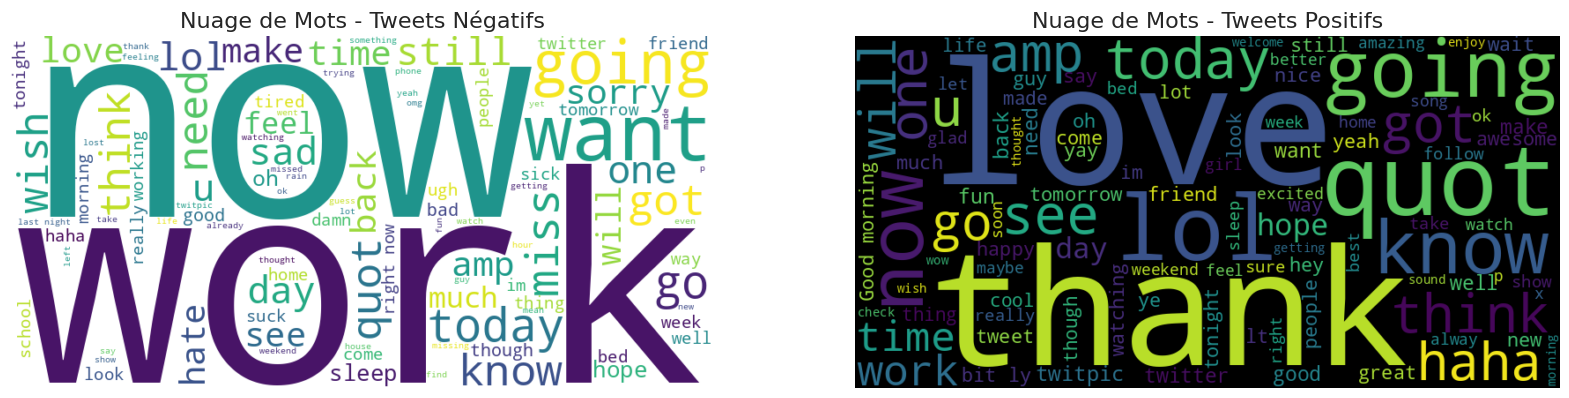

In [6]:
# Installation de la bibliothèque wordcloud
!pip install wordcloud -q # -q pour une installation silencieuse

from wordcloud import WordCloud

# Séparer les textes positifs et négatifs
text_negatif = " ".join(tweet for tweet in df_processed[df_processed['target'] == 0]['text'])
text_positif = " ".join(tweet for tweet in df_processed[df_processed['target'] == 1]['text'])

# Générer le nuage de mots pour les tweets négatifs
wordcloud_neg = WordCloud(max_words=100, background_color="white", width=800, height=400).generate(text_negatif)

# Générer le nuage de mots pour les tweets positifs
wordcloud_pos = WordCloud(max_words=100, background_color="black", width=800, height=400).generate(text_positif)

# Afficher les nuages de mots
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1) # Ligne 1, colonne 2, index 1
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title("Nuage de Mots - Tweets Négatifs", fontsize=16)

plt.subplot(1, 2, 2) # Ligne 1, colonne 2, index 2
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title("Nuage de Mots - Tweets Positifs", fontsize=16)

plt.show()

On remarque beaucoup de mots courants (**stopwords**) comme nous n'avons pas encore nettoyé le texte. C'est normal à ce stade, le but est d'avoir une première impression brute.

## Séparation des ensembles de données

Afin d’évaluer correctement les performances de nos modèles tout en évitant le surapprentissage, nous divisons notre jeu de données en trois sous-ensembles :

    Jeu d’entraînement (70%) – utilisé pour l’apprentissage du modèle.

    Jeu de validation (15%) – utilisé pour ajuster les hyperparamètres et évaluer les performances durant le développement.

    Jeu de test (15%) – utilisé pour mesurer la performance finale sur des données totalement inédites.

La division s’effectue en deux temps via train_test_split, tout en maintenant la proportion des classes (stratification) dans chaque ensemble. Cela garantit que le modèle est testé sur des échantillons représentatifs de la distribution initiale des données. Voici le code de séparation :

In [7]:
from sklearn.model_selection import train_test_split

# Définir les features (X) et la cible (y)
X = df_processed['text']
y = df_processed['target']

# Taille du jeu de test (15% du total)
test_size = 0.15
# Taille du jeu de validation (15% du total, soit 50% du reste après le premier split)
# Calculation: val_size_relative = val_size_absolute / (1 - train_size)
# val_size_relative = 0.15 / (1 - 0.70) = 0.15 / 0.30 = 0.5
validation_size_relative_to_temp = 0.50 # 15% / 30%

# Étape 1: Séparer Train (70%) et un jeu temporaire (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=(test_size * 2), # 0.30 pour le jeu temporaire
    random_state=42,      # Pour la reproductibilité
    stratify=y            # Important pour garder la proportion des classes
)

# Étape 2: Séparer le jeu temporaire (30%) en Validation (15%) et Test (15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=validation_size_relative_to_temp, # 0.50 du jeu temporaire (soit 15% du total)
    random_state=42,      # Assurer la reproductibilité aussi ici
    stratify=y_temp       # Stratifier également ce split
)

# Afficher les tailles des jeux pour vérifier
print(f"Taille du jeu d'entraînement (X_train): {X_train.shape[0]}")
print(f"Taille du jeu de validation (X_val):   {X_val.shape[0]}")
print(f"Taille du jeu de test (X_test):      {X_test.shape[0]}")

print(f"\nDistribution de la cible dans l'entraînement:\n{y_train.value_counts(normalize=True)}")
print(f"\nDistribution de la cible dans la validation:\n{y_val.value_counts(normalize=True)}")
print(f"\nDistribution de la cible dans le test:\n{y_test.value_counts(normalize=True)}")

# Recombiner en DataFrames
train_df = pd.DataFrame({'text': X_train, 'target': y_train})
val_df = pd.DataFrame({'text': X_val, 'target': y_val})
test_df = pd.DataFrame({'text': X_test, 'target': y_test})

Taille du jeu d'entraînement (X_train): 1120000
Taille du jeu de validation (X_val):   240000
Taille du jeu de test (X_test):      240000

Distribution de la cible dans l'entraînement:
target
1    0.5
0    0.5
Name: proportion, dtype: float64

Distribution de la cible dans la validation:
target
0    0.5
1    0.5
Name: proportion, dtype: float64

Distribution de la cible dans le test:
target
1    0.5
0    0.5
Name: proportion, dtype: float64


# Phase 2 : Prétraitement du Texte (Multi-Stratégies) ⚙️

Maintenant, passons à la prochaine étape : appliquer le **nettoyage minimal** commun à la colonne text de chacun de ces **trois DataFrames**. Cela créera une base propre (text_cleaned) avant les prétraitements plus spécifiques (lemma, stem, etc.).

In [8]:
import re

# Fonction pour le nettoyage minimal (URLs, mentions, et peut-être HTML entities)
def clean_minimal(text):
    # Supprimer les URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Supprimer les mentions (@utilisateur)
    text = re.sub(r'\@\w+', '', text)
    # Supprimer les caractères HTML (optionnel, ex: &)
    text = re.sub(r'&[a-z]+;', '', text)
    # Remplacer les espaces multiples par un seul et supprimer les espaces de début/fin
    text = re.sub(r'\s+', ' ', text).strip()
    return text

print("Fonction clean_minimal définie.")

Fonction clean_minimal définie.


In [9]:
# Appliquer clean_minimal sur le jeu d'entraînement
print("Nettoyage minimal du jeu d'entraînement...")
train_df['text_cleaned'] = train_df['text'].apply(clean_minimal)

# Appliquer clean_minimal sur le jeu de validation
print("Nettoyage minimal du jeu de validation...")
val_df['text_cleaned'] = val_df['text'].apply(clean_minimal)

# Appliquer clean_minimal sur le jeu de test
print("Nettoyage minimal du jeu de test...")
test_df['text_cleaned'] = test_df['text'].apply(clean_minimal)

print("\nNettoyage minimal terminé. Colonne 'text_cleaned' ajoutée.")

# Afficher quelques exemples pour vérifier
print("\nExemple après nettoyage minimal (entraînement) :")
print(train_df[['text', 'text_cleaned']].head())

Nettoyage minimal du jeu d'entraînement...
Nettoyage minimal du jeu de validation...
Nettoyage minimal du jeu de test...

Nettoyage minimal terminé. Colonne 'text_cleaned' ajoutée.

Exemple après nettoyage minimal (entraînement) :
                                                      text  \
1022641  @ErinGifford Please give me a swift kick in th...   
1436643  @alexbach your too pretty and too awesome. He ...   
734718   my neck is red like a boiled lobster and is gi...   
864253                              Heiï¿½e Ecke war toll    
1263647  @Ashh_x3 YAY  @KrystensAreject  don't be a par...   

                                              text_cleaned  
1022641  Please give me a swift kick in the arse if I c...  
1436643  your too pretty and too awesome. He can't hand...  
734718   my neck is red like a boiled lobster and is gi...  
864253                               Heiï¿½e Ecke war toll  
1263647                       YAY don't be a party pooper!  


On a bien une colonne text_cleaned qui a été ajoutée, qui nous a permis d'enlever les URL et les mentions entre autres. On va maintenant pouvoir définir la fonction de lemmatisation.

In [10]:
import spacy
import string # Pour la ponctuation

# Chargement du modèle spaCy (léger et rapide)
# Désactiver les composants non nécessaires (parser, ner) pour accélérer
try:
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    print("Modèle spaCy 'en_core_web_sm' chargé (composants désactivés: parser, ner).")
except OSError:
    print("Téléchargement du modèle spaCy 'en_core_web_sm'...")
    # Utilisation de -q pour quiet/silencieux
    !python -m spacy download en_core_web_sm -q
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    print("Modèle spaCy 'en_core_web_sm' chargé après téléchargement.")

# Vérifier les composants chargés
print(f"Pipeline spaCy actif : {nlp.pipe_names}")

Modèle spaCy 'en_core_web_sm' chargé (composants désactivés: parser, ner).
Pipeline spaCy actif : ['tok2vec', 'tagger', 'attribute_ruler', 'lemmatizer']


In [11]:
def lemmatize_doc(doc):
    """
    Prend un objet Doc spaCy et retourne une chaîne de lemmes.
    - Convertit en minuscules (via .lemma_ qui est souvent déjà en minuscules)
    - Supprime les stopwords spaCy
    - Supprime la ponctuation spaCy
    - Supprime les tokens qui sont juste des espaces
    """
    lemmas = []
    for token in doc:
        # Filtrer stopwords, ponctuation, et tokens vides/espaces
        if not token.is_stop and not token.is_punct and token.text.strip():
            lemmas.append(token.lemma_.lower()) # Assurer les minuscules
    return " ".join(lemmas)

print("Fonction lemmatize_doc définie.")

Fonction lemmatize_doc définie.


In [12]:
import time # Pour mesurer le temps

print(f"Traitement de {len(train_df)} textes du jeu d'entraînement avec nlp.pipe...")
start_time = time.time()

# Utiliser nlp.pipe sur la colonne text_cleaned
# as_tuples=True peut être légèrement plus rapide si on n'a pas besoin de l'objet Doc complet plus tard
# batch_size peut être ajusté en fonction de la RAM disponible (par défaut, spaCy choisit une taille raisonnable)
processed_docs = nlp.pipe(train_df['text_cleaned'], batch_size=10000)

# Appliquer notre fonction lemmatize_doc à chaque doc généré par nlp.pipe
# Utiliser une list comprehension pour l'efficacité
train_lemmas = [lemmatize_doc(doc) for doc in processed_docs]

end_time = time.time()
print(f"Lemmatisation du jeu d'entraînement terminée en {end_time - start_time:.2f} secondes.")

# Ajouter les résultats comme nouvelle colonne dans train_df
train_df['text_lemma'] = train_lemmas

print("Colonne 'text_lemma' ajoutée à train_df.")

# Afficher quelques exemples pour vérifier
print("\nExemple après lemmatisation (entraînement) :")
print(train_df[['text_cleaned', 'text_lemma']].head())

Traitement de 1120000 textes du jeu d'entraînement avec nlp.pipe...
Lemmatisation du jeu d'entraînement terminée en 1298.35 secondes.
Colonne 'text_lemma' ajoutée à train_df.

Exemple après lemmatisation (entraînement) :
                                              text_cleaned  \
1022641  Please give me a swift kick in the arse if I c...   
1436643  your too pretty and too awesome. He can't hand...   
734718   my neck is red like a boiled lobster and is gi...   
864253                               Heiï¿½e Ecke war toll   
1263647                       YAY don't be a party pooper!   

                                                text_lemma  
1022641                     swift kick arse change hit big  
1436643                              pretty awesome handle  
734718   neck red like boil lobster give massive amount...  
864253                               heiï¿½e ecke war toll  
1263647                                   yay party pooper  


La lemmatisation a bien été appliquée sur notre df_train, avec une nouvelle colonne créée. On peut maintenant passer à la fonction de stemming.

In [16]:
import nltk
# Télécharger les ressources nltk nécessaires si ce n'est pas déjà fait
# (stopwords sont utiles même si spaCy les gère, au cas où)
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords', quiet=True)


from nltk.stem.snowball import SnowballStemmer

# Initialiser le stemmer pour l'anglais
stemmer = SnowballStemmer(language='english')

print("Stemmer NLTK (Snowball) initialisé.")

Stemmer NLTK (Snowball) initialisé.


In [17]:
def stem_doc(doc):
    """
    Prend un objet Doc spaCy et retourne une chaîne de stems (racines).
    - Convertit en minuscules AVANT le stemming.
    - Supprime les stopwords spaCy.
    - Supprime la ponctuation spaCy.
    - Supprime les tokens qui sont juste des espaces.
    - Applique le stemmer NLTK (Snowball).
    """
    stems = []
    for token in doc:
        # Filtrer stopwords, ponctuation, et tokens vides/espaces
        if not token.is_stop and not token.is_punct and token.text.strip():
            # Appliquer le stemmer sur le texte du token en minuscules
            stems.append(stemmer.stem(token.text.lower()))
    return " ".join(stems)

print("Fonction stem_doc définie.")

Fonction stem_doc définie.


In [23]:
import time # Pour mesurer le temps

print(f"\nTraitement de {len(train_df)} textes du jeu d'entraînement pour le stemming avec nlp.pipe...")
start_time_stem = time.time()

# Utiliser nlp.pipe sur la colonne text_cleaned
processed_docs_stem = nlp.pipe(train_df['text_cleaned'], batch_size=10000)

# Appliquer notre fonction stem_doc à chaque doc généré par nlp.pipe
train_stems = [stem_doc(doc) for doc in processed_docs_stem]

end_time_stem = time.time()
print(f"Stemming du jeu d'entraînement terminé en {end_time_stem - start_time_stem:.2f} secondes.")

# Ajouter les résultats comme nouvelle colonne dans train_df
train_df['text_stem'] = train_stems

print("Colonne 'text_stem' ajoutée à train_df.")

# Afficher quelques exemples pour vérifier la différence avec lemma
print("\nExemple après stemming (entraînement) :")
print(train_df[['text_cleaned', 'text_lemma', 'text_stem']].head())


Traitement de 1120000 textes du jeu d'entraînement pour le stemming avec nlp.pipe...
Stemming du jeu d'entraînement terminé en 1354.17 secondes.
Colonne 'text_stem' ajoutée à train_df.

Exemple après stemming (entraînement) :
                                              text_cleaned  \
1022641  Please give me a swift kick in the arse if I c...   
1436643  your too pretty and too awesome. He can't hand...   
734718   my neck is red like a boiled lobster and is gi...   
864253                               Heiï¿½e Ecke war toll   
1263647                       YAY don't be a party pooper!   

                                                text_lemma  \
1022641                     swift kick arse change hit big   
1436643                              pretty awesome handle   
734718   neck red like boil lobster give massive amount...   
864253                               heiï¿½e ecke war toll   
1263647                                   yay party pooper   

                           

In [24]:
train_df

,text,target,text_cleaned,text_lemma,text_stem
1022641,@ErinGifford Please give me a swift kick in th...,1,Please give me a swift kick in the arse if I c...,swift kick arse change hit big,swift kick ars chang hit big
1436643,@alexbach your too pretty and too awesome. He ...,1,your too pretty and too awesome. He can't hand...,pretty awesome handle,pretti awesom handl
734718,my neck is red like a boiled lobster and is gi...,0,my neck is red like a boiled lobster and is gi...,neck red like boil lobster give massive amount...,neck red like boil lobster give massiv amount ...
864253,Heiï¿½e Ecke war toll,1,Heiï¿½e Ecke war toll,heiï¿½e ecke war toll,heiï¿½ eck war toll
1263647,@Ashh_x3 YAY @KrystensAreject don't be a par...,1,YAY don't be a party pooper!,yay party pooper,yay parti pooper
...,...,...,...,...,...
1203903,watching MTV movie awards,1,watching MTV movie awards,watch mtv movie award,watch mtv movi award
1069454,@samanthai Hehe!! I dont think I have to tell ...,1,Hehe!! I dont think I have to tell you.....you...,hehe not think tell know,hehe nt think tell know
1035781,Photovia tiresome) I love waking photos of nat...,1,Photovia tiresome) I love waking photos of nat...,photovia tiresome love wake photo nature,photovia tiresom love wake photo natur
985535,@BVonRose Bout time someone else joined me in ...,1,Bout time someone else joined me in this twitt...,bout time join twitterverse,bout time join twittervers


Le stemming a bien été appliqué sur l'ensemble d'entraînement. Maintenant, on va pouvoir appliquer les 2 fonctions de lemmatisation et de stemming sur les ensembles de validation et de test.

In [25]:
import time

# Lemmatisation pour le jeu de validation
print(f"\nTraitement de {len(val_df)} textes du jeu de validation pour la lemmatisation...")
start_time_val_lemma = time.time()

processed_docs_val = nlp.pipe(val_df['text_cleaned'], batch_size=5000) # Utiliser la même taille de batch
val_lemmas = [lemmatize_doc(doc) for doc in processed_docs_val]

end_time_val_lemma = time.time()
print(f"Lemmatisation du jeu de validation terminée en {end_time_val_lemma - start_time_val_lemma:.2f} secondes.")
val_df['text_lemma'] = val_lemmas
print("Colonne 'text_lemma' ajoutée à val_df.")

# Lemmatisation pour le jeu de test
print(f"\nTraitement de {len(test_df)} textes du jeu de test pour la lemmatisation...")
start_time_test_lemma = time.time()

processed_docs_test = nlp.pipe(test_df['text_cleaned'], batch_size=5000) # Utiliser la même taille de batch
test_lemmas = [lemmatize_doc(doc) for doc in processed_docs_test]

end_time_test_lemma = time.time()
print(f"Lemmatisation du jeu de test terminée en {end_time_test_lemma - start_time_test_lemma:.2f} secondes.")
test_df['text_lemma'] = test_lemmas
print("Colonne 'text_lemma' ajoutée à test_df.")

# Vérification rapide (optionnelle)
print("\nExemple val_df après lemmatisation:")
print(val_df[['text_cleaned', 'text_lemma']].head())
print("\nExemple test_df après lemmatisation:")
print(test_df[['text_cleaned', 'text_lemma']].head())


Traitement de 240000 textes du jeu de validation pour la lemmatisation...
Lemmatisation du jeu de validation terminée en 270.02 secondes.
Colonne 'text_lemma' ajoutée à val_df.

Traitement de 240000 textes du jeu de test pour la lemmatisation...
Lemmatisation du jeu de test terminée en 267.18 secondes.
Colonne 'text_lemma' ajoutée à test_df.

Exemple val_df après lemmatisation:
                                              text_cleaned  \
564885        Cummon people. Change the water. I'm thirsty   
1552321  @ ur boo . I quite agree . Life is for living ...   
159754   Wtf is wrong with me..im not like this....i ne...   
1445479  vote vote vote for Tom Fletcher ()! Please, pl...   
1525177                                Sounds good. Enjoy.   

                                                text_lemma  
564885                  cummon people change water thirsty  
1552321  ur boo agree life live watch predictable stuff...  
159754                        wtf wrong im like need sleep  
1

In [26]:
import time

# Stemming pour le jeu de validation
print(f"\nTraitement de {len(val_df)} textes du jeu de validation pour le stemming...")
start_time_val_stem = time.time()

processed_docs_val_stem = nlp.pipe(val_df['text_cleaned'], batch_size=5000)
val_stems = [stem_doc(doc) for doc in processed_docs_val_stem]

end_time_val_stem = time.time()
print(f"Stemming du jeu de validation terminée en {end_time_val_stem - start_time_val_stem:.2f} secondes.")
val_df['text_stem'] = val_stems
print("Colonne 'text_stem' ajoutée à val_df.")

# Stemming pour le jeu de test
print(f"\nTraitement de {len(test_df)} textes du jeu de test pour le stemming...")
start_time_test_stem = time.time()

processed_docs_test_stem = nlp.pipe(test_df['text_cleaned'], batch_size=5000)
test_stems = [stem_doc(doc) for doc in processed_docs_test_stem]

end_time_test_stem = time.time()
print(f"Stemming du jeu de test terminée en {end_time_test_stem - start_time_test_stem:.2f} secondes.")
test_df['text_stem'] = test_stems
print("Colonne 'text_stem' ajoutée à test_df.")

# Vérification rapide (optionnelle)
print("\nExemple val_df après stemming:")
print(val_df[['text_lemma', 'text_stem']].head())
print("\nExemple test_df après stemming:")
print(test_df[['text_lemma', 'text_stem']].head())


Traitement de 240000 textes du jeu de validation pour le stemming...
Stemming du jeu de validation terminée en 286.52 secondes.
Colonne 'text_stem' ajoutée à val_df.

Traitement de 240000 textes du jeu de test pour le stemming...
Stemming du jeu de test terminée en 285.58 secondes.
Colonne 'text_stem' ajoutée à test_df.

Exemple val_df après stemming:
                                                text_lemma  \
564885                  cummon people change water thirsty   
1552321  ur boo agree life live watch predictable stuff...   
159754                        wtf wrong im like need sleep   
1445479                  vote vote vote tom fletcher let 1   
1525177                                   sound good enjoy   

                                                 text_stem  
564885                    cummon peopl chang water thirsti  
1552321  ur boo agre life live watch predict stuff bb e...  
159754                        wtf wrong im like need sleep  
1445479                  vot

In [27]:
import os # Pour manipuler les chemins de fichiers

# Définir le dossier de sauvegarde sur Google Drive
save_dir = '/content/drive/MyDrive/Colab Notebooks/OC/P7/'

# Créer le dossier s'il n'existe pas
os.makedirs(save_dir, exist_ok=True)

# Définir les chemins complets pour chaque fichier
train_pickle_path = os.path.join(save_dir, 'train_processed.pkl')
val_pickle_path = os.path.join(save_dir, 'val_processed.pkl')
test_pickle_path = os.path.join(save_dir, 'test_processed.pkl')

# Sauvegarder train_df
print(f"Sauvegarde de train_df en Pickle à : {train_pickle_path}")
train_df.to_pickle(train_pickle_path)
print("Sauvegarde de train_df terminée.")

# Sauvegarder val_df
print(f"\nSauvegarde de val_df en Pickle à : {val_pickle_path}")
val_df.to_pickle(val_pickle_path)
print("Sauvegarde de val_df terminée.")

# Sauvegarder test_df
print(f"\nSauvegarde de test_df en Pickle à : {test_pickle_path}")
test_df.to_pickle(test_pickle_path)
print("Sauvegarde de test_df terminée.")

Sauvegarde de train_df en Pickle à : /content/drive/MyDrive/Colab Notebooks/OC/P7/train_processed.pkl
Sauvegarde de train_df terminée.

Sauvegarde de val_df en Pickle à : /content/drive/MyDrive/Colab Notebooks/OC/P7/val_processed.pkl
Sauvegarde de val_df terminée.

Sauvegarde de test_df en Pickle à : /content/drive/MyDrive/Colab Notebooks/OC/P7/test_processed.pkl
Sauvegarde de test_df terminée.


In [35]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.gitignore

nothing added to commit but untracked files present (use "git add" to track)


# Phase 3 : Modélisation & Expérimentation (avec MLflow) 🧪

## Imports

In [6]:
import pandas as pd
import os

# Définir le dossier de chargement (doit correspondre au dossier de sauvegarde)
load_dir = '/content/drive/MyDrive/Colab Notebooks/OC/P7/'

# Définir les chemins complets pour chaque fichier
train_pickle_path = os.path.join(load_dir, 'train_processed.pkl')
val_pickle_path = os.path.join(load_dir, 'val_processed.pkl')
test_pickle_path = os.path.join(load_dir, 'test_processed.pkl')

# Charger train_df
print(f"Chargement de train_df depuis Pickle : {train_pickle_path}")
train_df = pd.read_pickle(train_pickle_path)
print("Chargement de train_df terminé.")
print("Info train_df:")
train_df.info()

# Charger val_df
print(f"\nChargement de val_df depuis Pickle : {val_pickle_path}")
val_df = pd.read_pickle(val_pickle_path)
print("Chargement de val_df terminé.")
print("Info val_df:")
val_df.info()

# Charger test_df
print(f"\nChargement de test_df depuis Pickle : {test_pickle_path}")
test_df = pd.read_pickle(test_pickle_path)
print("Chargement de test_df terminé.")
print("Info test_df:")
test_df.info()

print("\nLes trois DataFrames prétraités ont été rechargés.")

Chargement de train_df depuis Pickle : /content/drive/MyDrive/Colab Notebooks/OC/P7/train_processed.pkl
Chargement de train_df terminé.
Info train_df:
<class 'pandas.core.frame.DataFrame'>
Index: 1120000 entries, 1022641 to 502113
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   text          1120000 non-null  object
 1   target        1120000 non-null  int64 
 2   text_cleaned  1120000 non-null  object
 3   text_lemma    1120000 non-null  object
 4   text_stem     1120000 non-null  object
dtypes: int64(1), object(4)
memory usage: 51.3+ MB

Chargement de val_df depuis Pickle : /content/drive/MyDrive/Colab Notebooks/OC/P7/val_processed.pkl
Chargement de val_df terminé.
Info val_df:
<class 'pandas.core.frame.DataFrame'>
Index: 240000 entries, 564885 to 1195248
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   text          240000 non-null  o

## Expérimentation 1 : Modèle de Référence (Bag-of-Words)

Le premier modèle utilisera une approche classique **Bag-of-Words**, spécifiquement **TF-IDF**, et un classifieur simple comme la **Régression Logistique.** Nous utiliserons la colonne text_lemma comme input textuel. C'est un excellent point de départ pour établir une **performance de base** à battre avec les modèles plus complexes.

Assurons-nous d'avoir les importations pour la vectorisation, le modèle, les métriques, et MLflow.

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, f1_score, precision_score,
                             recall_score, confusion_matrix) # Ajout confusion_matrix

import mlflow
import mlflow.sklearn
import time
import matplotlib.pyplot as plt # Ajout pour visualisation
import seaborn as sns          # Ajout pour visualisation

# --- Configuration MLflow ---
mlflow.set_experiment("AirParadis_Sentiment_Analysis")
run_name = "Baseline_TFIDF_LogisticRegression"

# --- Démarrage du Run MLflow ---
with mlflow.start_run(run_name=run_name):
    print(f"Démarrage du run MLflow : {run_name}")
    start_time = time.time()

    # --- Paramètres (identiques à avant) ---
    vectorizer_params = {'max_features': 5000, 'ngram_range': (1, 2)}
    model_params = {'C': 1.0, 'solver': 'liblinear'}
    text_column_used = 'text_lemma'

    mlflow.log_param("text_preprocessing", text_column_used)
    mlflow.log_params(vectorizer_params)
    mlflow.log_params(model_params)
    mlflow.log_param("model_type", "LogisticRegression")
    mlflow.log_param("vectorizer_type", "TfidfVectorizer")

    # --- Pipeline (identique) ---
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(**vectorizer_params)),
        ('clf', LogisticRegression(**model_params, random_state=42))
    ])

    # --- Entraînement ---
    print("Entraînement du pipeline...")
    pipeline.fit(train_df[text_column_used], train_df['target'])
    training_time = time.time() - start_time
    print(f"Entraînement terminé en {training_time:.2f} secondes.")
    mlflow.log_metric("training_time_seconds", training_time)

    # --- Évaluation sur le JEU D'ENTRAÎNEMENT ---
    print("Évaluation sur le jeu d'entraînement...")
    y_train_pred = pipeline.predict(train_df[text_column_used])
    train_accuracy = accuracy_score(train_df['target'], y_train_pred)
    train_f1 = f1_score(train_df['target'], y_train_pred)
    train_precision = precision_score(train_df['target'], y_train_pred)
    train_recall = recall_score(train_df['target'], y_train_pred)
    print(f"Train - Accuracy: {train_accuracy:.4f}, F1: {train_f1:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}")
    mlflow.log_metric("train_accuracy", train_accuracy)
    mlflow.log_metric("train_f1", train_f1)
    mlflow.log_metric("train_precision", train_precision)
    mlflow.log_metric("train_recall", train_recall)

    # --- Évaluation sur Validation Set ---
    print("Évaluation sur le jeu de validation...")
    y_val_pred = pipeline.predict(val_df[text_column_used])
    val_accuracy = accuracy_score(val_df['target'], y_val_pred)
    val_f1 = f1_score(val_df['target'], y_val_pred)
    val_precision = precision_score(val_df['target'], y_val_pred)
    val_recall = recall_score(val_df['target'], y_val_pred)
    print(f"Validation - Accuracy: {val_accuracy:.4f}, F1: {val_f1:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}")
    mlflow.log_metric("validation_accuracy", val_accuracy)
    mlflow.log_metric("validation_f1", val_f1)
    mlflow.log_metric("validation_precision", val_precision)
    mlflow.log_metric("validation_recall", val_recall)

    # --- Évaluation sur Test Set ---
    print("Évaluation sur le jeu de test...")
    y_test_pred = pipeline.predict(test_df[text_column_used])
    test_accuracy = accuracy_score(test_df['target'], y_test_pred)
    test_f1 = f1_score(test_df['target'], y_test_pred)
    test_precision = precision_score(test_df['target'], y_test_pred)
    test_recall = recall_score(test_df['target'], y_test_pred)
    print(f"Test - Accuracy: {test_accuracy:.4f}, F1: {test_f1:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}")
    mlflow.log_metric("test_accuracy", test_accuracy)
    mlflow.log_metric("test_f1", test_f1)
    mlflow.log_metric("test_precision", test_precision)
    mlflow.log_metric("test_recall", test_recall)

    # --- Visualisation: Matrice de Confusion (sur Test Set) ---
    print("Génération de la matrice de confusion pour le jeu de test...")
    cm = confusion_matrix(test_df['target'], y_test_pred)
    fig_cm, ax_cm = plt.subplots(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax_cm,
                xticklabels=['Négatif (0)', 'Positif (1)'],
                yticklabels=['Négatif (0)', 'Positif (1)'])
    ax_cm.set_xlabel('Prédiction')
    ax_cm.set_ylabel('Vraie valeur')
    ax_cm.set_title('Matrice de Confusion (Test Set)')
    plt.tight_layout()
    plt.show()

    # Logguer la figure dans MLflow comme artefact
    mlflow.log_figure(fig_cm, "confusion_matrix_test_set.png")
    print("Matrice de confusion sauvegardée dans MLflow.")
    plt.close(fig_cm) # Fermer la figure pour éviter l'affichage automatique multiple


    # --- Sauvegarde du Modèle (Pipeline) avec MLflow ---
    print("Sauvegarde du pipeline avec MLflow...")
    mlflow.sklearn.log_model(
        sk_model=pipeline,
        artifact_path="tfidf-logistic-regression-model",
        # signature=signature # On pourrait ajouter une signature ici
        # input_example=train_df[text_column_used].iloc[:5] # Et/ou un exemple d'input
    )
    print("Pipeline sauvegardé.")

print("\nRun MLflow (v2) terminé.")

2025/04/25 14:29:54 INFO mlflow.tracking.fluent: Experiment with name 'AirParadis_Sentiment_Analysis' does not exist. Creating a new experiment.


Démarrage du run MLflow : Baseline_TFIDF_LogisticRegression_v2
Entraînement du pipeline...
Entraînement terminé en 83.49 secondes.
Évaluation sur le jeu d'entraînement...
Train - Accuracy: 0.7650, F1: 0.7713, Precision: 0.7511, Recall: 0.7927
Évaluation sur le jeu de validation...
Validation - Accuracy: 0.7625, F1: 0.7689, Precision: 0.7488, Recall: 0.7902
Évaluation sur le jeu de test...
Test - Accuracy: 0.7617, F1: 0.7679, Precision: 0.7484, Recall: 0.7884
Génération de la matrice de confusion pour le jeu de test...
Matrice de confusion sauvegardée dans MLflow.
Sauvegarde du pipeline avec MLflow...


2025/04/25 14:31:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Pipeline sauvegardé.

Run MLflow (v2) terminé.


## Expérimentation 2 : Modèle DL Simple (Embedding Keras)

## Expérimentation 3 & 4 : Embeddings Pré-entraînés (Word2Vec/GloVe/FastText)

## Expérimentation 5 : Modèle DL avec LSTM / BiLSTM

## Expérimentation 6 : Modèle BERT (Transfer Learning)

## Expérimentation 7 : Modèle USE (Transfer Learning)

# Script Github

In [14]:
# Utiliser %%writefile -a pour ajouter à la fin du fichier .gitignore
# Crée le fichier s'il n'existe pas.
%%writefile -a .gitignore

# Fichiers de données volumineux
*.pkl
*.parquet

# Fichiers et dossiers Python courants à ignorer
__pycache__/
*.pyc
*.pyo
*.pyd
.Python
env/
venv/
ENV/
env.bak/
venv.bak/

# Fichiers de configuration d'IDE et checkpoints
.vscode/
.idea/
*.swp
*.swo
.ipynb_checkpoints/

# Fichiers secrets et de dépendances locales (si utilisés)
.env
*.log

Writing .gitignore


In [12]:
%cd /content/OC

/content/OC


In [26]:
# Vérifier le statut (devrait montrer .gitignore comme modifié ou non suivi)
!git status

# Ajouter le fichier .gitignore aux modifications à commiter
!git add .gitignore

On branch main
Your branch is ahead of 'origin/main' by 1 commit.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean


In [ ]:
# Chemin source : où se trouve le notebook sur Google Drive
source_notebook_path = '/content/drive/MyDrive/Colab Notebooks/OC/P7/Notebook_de_modélisation.ipynb'

# Chemin destination : le dossier actuel '/content/OC/'
destination_path = '/content/OC/'

# Copie du fichier
!cp "{source_notebook_path}" "{destination_path}"

print(f"Vérification : contenu du dossier après copie :")
!ls

In [ ]:
!git status

In [18]:
!git add Notebook_de_modélisation.ipynb

In [20]:
!git config --global user.email "carre.mathis@proton.me"
!git config --global user.name "M-Carre"

In [ ]:
!git commit -m "Début des modélisations - fin de session"

In [ ]:
!git remote -v

In [ ]:
# 1. Ajouter le notebook nettoyé à la zone de staging
!git add Notebook_de_modélisation.ipynb

# 2. Modifier le dernier commit pour inclure ce changement
# --amend : modifie le commit précédent au lieu d'en créer un nouveau
# --no-edit : conserve le message de commit précédent ("Début des modélisations - fin de session")
!git commit --amend --no-edit

print("Le dernier commit a été modifié pour inclure le notebook nettoyé.")

In [ ]:
import os
from getpass import getpass

# --- PAT ici quand le prompt apparaît ---
personal_access_token = getpass('Collez votre GitHub Personal Access Token ici et appuyez sur Entrée: ')
os.environ['GITHUB_TOKEN'] = personal_access_token # Stocke temporairement


# Nom d'utilisateur GitHub
github_username = "M-Carre"
# Nom exact du dépôt sur GitHub
repo_name = "OC"
# Nom de la branche principale ('main')
branch_name = "main"

# Construction de l'URL sécurisée
git_push_url = f"https://{os.environ['GITHUB_TOKEN']}@github.com/{github_username}/{repo_name}.git"

# Exécution de la commande push
# L'option '-u' lie la branche locale à la branche distante pour les futurs push/pull
print(f"Tentative de push vers la branche '{branch_name}'...")
!git push -u {git_push_url} {branch_name}

# Nettoyer la variable d'environnement (bonne pratique)
del os.environ['GITHUB_TOKEN']